In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uplift = pd.read_csv('lentahack/20210518_uplift.csv')
checks = pd.read_csv('lentahack/20210518_checks.csv')
offers = pd.read_csv('lentahack/20210521_offers.csv')
hierarchy = pd.read_csv('lentahack/20210518_hierarchy.csv')

h = pd.read_csv('offers_date.csv')



In [3]:
checks['day'] = pd.to_datetime(checks['day'], format ='%Y%m%d')

offers['start_date'] = pd.to_datetime(offers['start_date'], format ='%Y%m%d')
offers['end_date'] = pd.to_datetime(offers['end_date'], format ='%Y%m%d')

offers['diff_dates'] = (offers['end_date'] - offers['start_date']).astype('timedelta64[D]')
#hierarchy['diff_dates'] = hierarchy['diff_dates'].apply(lambda x :round(x/60,2))
offers['end_day_of_weekk'] = offers['end_date'].dt.dayofweek
offers['start_day_of_weekk'] = offers['start_date'].dt.dayofweek
offers['quarter'] = offers['start_date'].dt.quarter
offer = offers[offers['train_test_group'] == 'train']


In [4]:
offers['month'] = pd.DatetimeIndex(offers['start_date'] ).month


In [5]:
checks['month'] = pd.DatetimeIndex(checks['day']).month

In [6]:
#3result = pd.merge(checks, offers, how="inner", on=["sku", "month"])

In [7]:
#result

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,...,month,Promo_type,Offer_ID,start_date,end_date,train_test_group,diff_dates,end_day_of_weekk,start_day_of_weekk,quarter
0,936445a0ef613a41958d09bc17e1bada,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,e5a4efd425d990e3273773bb36c0910f,23:35:14,40e1372e6aebbf19d15dbf80150f96c5,314afc461f361ebf6d9bcc75eb1de65c,2,0.938,141.33,...,12,Facades,F242,2019-12-12,2019-12-18,train,6.0,2,3,4
1,0be655bcea06e49dcd0b2434714bd53f,2019-12-30,29549a71a57f587d88209b9c1f1b7999,a2cc5a562cbe27bc8e85aeb1eb572c8b,10:21:44,40e1372e6aebbf19d15dbf80150f96c5,76d2bdea5b0050576b3aef3a28fd9969,6,0.614,89.16,...,12,Facades,F242,2019-12-12,2019-12-18,train,6.0,2,3,4
2,894d5cddcd55b7cc5fc442803d99e419,2019-12-30,29549a71a57f587d88209b9c1f1b7999,614dbdf575506c5c5eb5fdee24bb2fc4,11:27:13,40e1372e6aebbf19d15dbf80150f96c5,76d2bdea5b0050576b3aef3a28fd9969,7,0.640,92.93,...,12,Facades,F242,2019-12-12,2019-12-18,train,6.0,2,3,4
3,f78b84c9cce21825cf576c9273a21e85,2019-12-30,612b9796c617960a4e9abe05845c3d43,150cd985eacf834d8e856ab87491c534,13:52:00,40e1372e6aebbf19d15dbf80150f96c5,abc59dca6721df4bed08afd6bc74d024,3,0.722,106.21,...,12,Facades,F242,2019-12-12,2019-12-18,train,6.0,2,3,4
4,0ca1a507009f3a40284f11743b327eae,2019-12-30,d972dc8564e175effccbcb3e402650eb,4ffb56f3ba73128339fc5d7a96effa84,20:07:25,40e1372e6aebbf19d15dbf80150f96c5,a9ca7470791f4dca46e9ea1b3f9f2f22,11,0.620,98.01,...,12,Facades,F242,2019-12-12,2019-12-18,train,6.0,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995809,f0f5e2e8bbbf6f0e243ef47cf8d9aac9,2019-10-14,24a41dfc0b09c248bbc23b5e1ffc16d8,25e3d27bcd7aff13219211853124aa09,14:41:40,b3b88af7328c6683b697caf851653e1c,1742a7a47d80d6b65de00e9f49edd15c,1,1.000,63.89,...,10,Seasonal,322,2020-10-20,2020-11-02,test,13.0,0,1,4
1995810,b99360d7eb9f2ff79cb634724d23bb4b,2019-10-28,a9dd14d824822d6d78d0fe3e55dbd7fb,b69c60710ca86055162b4c8f6728f4cd,20:38:43,e34cd9643334ed4f9ec99d699f258a76,7215ee9c7d9dc229d2921a40e899ec5f,58,1.000,165.25,...,10,Biweekly,679,2019-10-31,2019-11-13,train,13.0,2,3,4
1995811,b23d74c15f909f86d81b078d4ed82ffd,2019-10-28,6950aac2d7932e1f1a4c3cf6ada1316e,2c01b1474c623da47003fcaa04bfeb00,13:56:35,67cf6656b186cec6b44749472c7ebd82,6774be30d9813ee5b9a7d647bd9b38a6,13,1.000,501.06,...,10,Facades,F173,2020-10-14,2020-10-21,test,7.0,2,2,4
1995812,b23d74c15f909f86d81b078d4ed82ffd,2019-10-28,6950aac2d7932e1f1a4c3cf6ada1316e,2c01b1474c623da47003fcaa04bfeb00,13:56:35,67cf6656b186cec6b44749472c7ebd82,6774be30d9813ee5b9a7d647bd9b38a6,13,1.000,501.06,...,10,Seasonal,434,2020-10-27,2020-11-16,test,20.0,0,1,4


In [8]:
# Big table

In [ ]:

big = pd.read_csv('lentahack/checks_ofr_df.csv')

In [ ]:
big['day'] = pd.to_datetime(big['day'], format ='%Y%m%d')



In [ ]:
big.iloc[:, 5:]

In [ ]:
big['Offer_ID'] = big['Offer_ID'].astype(str)
big['Promo_type'] = big['Promo_type'].astype(str)

In [ ]:
big_client = big.groupby('client_id').agg(
    shop_id = pd.NamedAgg(column = 'shop_id', aggfunc = lambda x: ','.join(x.unique())),
    date = pd.NamedAgg(column = 'date', aggfunc = lambda x: ','.join(x.unique())),
    check_id = pd.NamedAgg(column = 'check_id', aggfunc = lambda x: ','.join(x.unique())),
    
    Promo_type = pd.NamedAgg(column = 'Promo_type', aggfunc = lambda x: ','.join(x.unique())),
    Offer_ID = pd.NamedAgg(column = 'Offer_ID', aggfunc = lambda x: ','.join(x.unique())),
    
    num_sales = pd.NamedAgg(column = 'num_sales',   aggfunc = np.mean      )
    #date_max = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.max      ),
    #date_min = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.min      )
   
)

In [ ]:
big_client.iloc[0]

In [ ]:
checks['day'].min()

In [ ]:
checks['day'].max()

In [ ]:
# Splitting into the periods

In [ ]:
checks

In [ ]:
checks_test = checks[checks['day'] < '2019-10-01']

In [ ]:
checks_1 = checks[checks['day'] < '2019-12-01']

In [ ]:
checks_2 = checks[(checks['day'] >= '2019-12-01')  & (checks['day'] < '2020-03-01')]

In [ ]:
checks_3 = checks[(checks['day'] >= '2020-03-01')  & (checks['day'] < '2020-06-01')]

In [ ]:
checks_4 = checks[(checks['day'] >= '2020-06-01')  & (checks['day'] < '2020-09-01')]

In [ ]:
checks_1['day'].max()

In [ ]:
checks_t = checks_test.groupby('client_id').agg(
    shop_id = pd.NamedAgg(column = 'shop_id', aggfunc = lambda x: ','.join(x.unique())),
    #date = pd.NamedAgg(column = 'day', aggfunc = lambda x: ','.join(x.unique())),
    check_id = pd.NamedAgg(column = 'check_id', aggfunc = lambda x: ','.join(x.unique())))
    

In [ ]:
checks_test.head(50)

In [ ]:
# merge checks with offers and inner on sku. On date  < '2019-10-01'

In [ ]:
checks_merged_test = pd.merge(checks_test, big, how="inner", on=["sku"])

In [ ]:
checks_merged_test

In [213]:
#checks.merge(offers, how = 'inner', on = 'sku')

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,...,region_name,Promo_type,Offer_ID,start_date,end_date,train_test_group,diff_dates,end_day_of_weekk,start_day_of_weekk,quarter
0,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,...,152f1b77a32508570e2745daf9ce7aec,Biweekly,287,2020-03-19,2020-04-01,train,13.0,2,3,1
1,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,...,152f1b77a32508570e2745daf9ce7aec,Biweekly,369,2020-06-25,2020-07-08,train,13.0,2,3,2
2,4d834f7ca2a047dd528cd67437612e03,2019-12-30,7d7c45b9a935cf9d845fc75679a41559,4b00d8b990484fde1f7db8c444790d26,15:58:46,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,...,7e35e74e610188414ad24235dd787c78,Biweekly,287,2020-03-19,2020-04-01,train,13.0,2,3,1
3,4d834f7ca2a047dd528cd67437612e03,2019-12-30,7d7c45b9a935cf9d845fc75679a41559,4b00d8b990484fde1f7db8c444790d26,15:58:46,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,...,7e35e74e610188414ad24235dd787c78,Biweekly,369,2020-06-25,2020-07-08,train,13.0,2,3,2
4,e21fddf3d068908dddd90810815f0004,2019-12-30,4bc8f1a601aee89546deeb66b9625008,a00f18d0ee1159d88a87f92b027febb1,11:12:14,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,1,1.0,96.77,...,7e35e74e610188414ad24235dd787c78,Biweekly,287,2020-03-19,2020-04-01,train,13.0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821451,ab7537def14ed7ff7f0843b44b9d636e,2019-12-03,7f1a65908b05238c21c134c764c89e28,8ff909ceb0d997b0f8a4566543947531,13:43:06,5a7611f54e2ba26fe06f3f3c12ef3b02,ae8916fb97aa0dc9d3733d0b2cd6de51,8,1.0,14.40,...,152f1b77a32508570e2745daf9ce7aec,Biweekly,68,2020-03-05,2020-03-18,train,13.0,2,3,1
17821452,ab7537def14ed7ff7f0843b44b9d636e,2019-12-03,7f1a65908b05238c21c134c764c89e28,8ff909ceb0d997b0f8a4566543947531,13:43:06,5a7611f54e2ba26fe06f3f3c12ef3b02,ae8916fb97aa0dc9d3733d0b2cd6de51,8,1.0,14.40,...,152f1b77a32508570e2745daf9ce7aec,Biweekly,372,2020-11-26,2020-12-16,test,20.0,2,3,4
17821453,ca625b6c2339fbaa0874c8718b37a311,2020-08-11,8c5781246fcb0296e1f11cd4e2eee68d,ea9b172f9c4a034ac362042467f56689,12:47:24,8964706878d0b9b204714280296925d7,3321c53a192cfa09b6ac470996f05126,2,1.0,108.63,...,7e35e74e610188414ad24235dd787c78,Biweekly,368,2020-06-25,2020-07-08,train,13.0,2,3,2
17821454,ba545b22f109edcf9ffb7393a270967e,2020-06-25,7f8bb0fe8b33780a08fe6b60ced14529,784e4a0c86341e71b168d1361d1b95d8,21:31:57,3a8e820bc89e71dbb6a42eac4aeea9b1,0223b442b8b9894db11478a556b1aabc,7,1.0,754.60,...,152f1b77a32508570e2745daf9ce7aec,Seasonal,585,2019-11-05,2019-11-25,train,20.0,0,1,4


In [212]:
checks

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name
0,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b17c870027bb4a22e3aedb971bc00def,b3deb0286313f0b888c0eac49580cc23,1,5.0,133.40,249.45,152f1b77a32508570e2745daf9ce7aec
1,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,118.99,152f1b77a32508570e2745daf9ce7aec
2,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5,2.0,2.34,7.58,152f1b77a32508570e2745daf9ce7aec
3,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b25e0d42165d246d23cbf4d3efcdf583,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,23.59,39.99,152f1b77a32508570e2745daf9ce7aec
4,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,a537d2eef30d47f9b11d655421ca93fb,05c93d4fa9bdbe70b5d2204ce9548ca9,3,1.0,24.02,39.99,152f1b77a32508570e2745daf9ce7aec
...,...,...,...,...,...,...,...,...,...,...,...,...
21479254,128bfb96146f0772ce9ce35365b5b402,2020-01-01,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,dc155ba1e8a3c759bcf2f358384ba9cd,f1b40313f0dc51fde3fe2cc7bc2b987f,10,1.0,63.63,99.89,7e35e74e610188414ad24235dd787c78
21479255,128bfb96146f0772ce9ce35365b5b402,2020-01-01,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,305d39a0a0af37b5436e8a3ff3e9d319,357f92d49be136644805a94cdbeb462a,6,1.0,185.70,298.99,7e35e74e610188414ad24235dd787c78
21479256,128bfb96146f0772ce9ce35365b5b402,2020-01-01,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,2,1.0,1.14,3.49,7e35e74e610188414ad24235dd787c78
21479257,128bfb96146f0772ce9ce35365b5b402,2020-01-01,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,6540ad4c3e0b21d5a804b692dda6fe66,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,37.63,74.99,7e35e74e610188414ad24235dd787c78


In [210]:
checks['sku'].value_counts()


b75147feae4cf8ec07fb5f2cef855def    388682
142d63107737a448dc2dfe2dcd0154b8    359273
6278f48a43fb0a23036b3a11c92e726c    218902
ab17bf24039893348f6b9f23753f38ca     82254
767aaeb00eb1c7dd273ba954b3e2f4b8     79895
                                     ...  
7b39710fa0eb58b483d6841bc518134c         1
58728a2dbd718d660eb151e365cea776         1
7343fe1652ed5933a2d5c99e793e340e         1
41a483d29647b4ca4ee912349485c337         1
99cb266f4dfd1f7f3b40edc139d96cee         1
Name: sku, Length: 80406, dtype: int64

In [204]:
offers['sku'].value_counts()

5abc0869d756fa1c6831651776138baa    26
33306ccd877e73c388652739869d3dc7    22
7a8675a8f6988ebcbefd062fabaccc85    21
c8ac520562ba934dd67cbf0f060c4252    18
787762f7d829ce318599bf015baba175    17
                                    ..
0875fdda47273bd8af25dbe215d0ac70     1
e9166220e305cf3c1ba2725a4fe2ab97     1
3eb071afcb1f4ef8d7ce5779403504e7     1
72be9af575bb017b1778d0e005a3b351     1
e0763787e86c1d737485fcc526fdf204     1
Name: sku, Length: 4200, dtype: int64

In [208]:
offers[offers['sku'] == 'ab17bf24039893348f6b9f23753f38ca']

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group


In [203]:
hierarchy

,sku,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,29285fb39582e5a63c14026198c6ad51,44a7b825383402ed937a15fb8a5bb12a,9a1158154dfa42caddbd0694a4e9bdc8,f50c7035e532c49a0f6993d988e2e843,e9f41ed96e63ca1be6aea099625afe6f
1,f31d0af494b191ef2bc8395db9c8366f,44a7b825383402ed937a15fb8a5bb12a,ad61ab143223efbc24c7d2583be69251,84e8ce7870f0eecd843366582bb95a28,b7fa186535a75c869bfaece622c72689
2,49edad6669ba09dffbf278b76c53cd9d,cc9284597026dcc021735c0970ca0c93,1c383cd30b7c298ab50293adfecb7b18,2a3d6d6cc4b5e77238c1fc1bb6cdd681,7e0e0c1fe174b2d2efbf5ae0e2bc3ee9
3,c5c632eb0f93a233ef6db2620a464ea0,44a7b825383402ed937a15fb8a5bb12a,d82c8d1619ad8176d665453cfb2e55f0,b27d5296bede63b1493a5d321d4e8092,ec2acf8ebfdb679d5fc87caadd98fb58
4,9d0c7880f16c7748e1e992b28655c67f,cc9284597026dcc021735c0970ca0c93,6ea9ab1baa0efb9e19094440c317e21b,379a7ba015d8bf1c70b8add2c287c6fa,5aec2478fac4d1ee912c794c343d036c
...,...,...,...,...,...
80401,33d0eb46ca492585ccf3ba2bcc19ed30,44a7b825383402ed937a15fb8a5bb12a,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,b02ece95d7615f1b007e29a316cd7292
80402,bb47f5bc8df7b92ae0600c7d85a567fd,cc9284597026dcc021735c0970ca0c93,a1d0c6e83f027327d8461063f4ac58a6,3335881e06d4d23091389226225e17c7,4028a78ad465aea9c6024f81ca22c78d
80403,e9311b17cd22904c2d6fee2e3c8b6d5f,44a7b825383402ed937a15fb8a5bb12a,ad61ab143223efbc24c7d2583be69251,dcc5c249e15c211f21e1da0f3ba66169,9b4166e30f69d57136493e52c97bc874
80404,15cafb345d5e95b3ae83f2cbb87e0f72,44a7b825383402ed937a15fb8a5bb12a,d2ddea18f00665ce8623e36bd4e3c7c5,a523426cc585745318d5f6d91a9c0706,846a6cd5242ad9c4e8eea0621a9cf252


In [158]:
uplift.head(5)

,Offer_ID,UpLift
0,241,1.743427
1,70,16.870948
2,342,15.185624
3,B33,0.921722
4,244,4.862729


In [159]:
uplift['Offer_ID'].nunique()

740

In [164]:
offers

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group
0,Facades,F26,71c770923102af052f64c6036c9dd590,20200213,20200219,train
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,20200102,20200108,train
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,20200116,20200122,train
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,20200319,20200325,train
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,20201112,20201118,test
...,...,...,...,...,...,...
9771,Biweekly,683,0f368be7897dd1531e43dc37115eeaf0,20191114,20191127,train
9772,Biweekly,691,47c28bf957fe120f2d016e46911e5bdb,20191114,20191127,train
9773,Biweekly,683,00432d021eca6059fee2ed69a732c2b2,20191114,20191127,train
9774,Biweekly,690,40d78b3648a4ea15f300070a0ffd9752,20191114,20191127,train


In [165]:
checks.head(5)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name
0,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b17c870027bb4a22e3aedb971bc00def,b3deb0286313f0b888c0eac49580cc23,1,5.0,133.40,249.45,152f1b77a32508570e2745daf9ce7aec
1,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,118.99,152f1b77a32508570e2745daf9ce7aec
2,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5,2.0,2.34,7.58,152f1b77a32508570e2745daf9ce7aec
3,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b25e0d42165d246d23cbf4d3efcdf583,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,23.59,39.99,152f1b77a32508570e2745daf9ce7aec
4,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,a537d2eef30d47f9b11d655421ca93fb,05c93d4fa9bdbe70b5d2204ce9548ca9,3,1.0,24.02,39.99,152f1b77a32508570e2745daf9ce7aec


In [179]:
offers.head(5)

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,diff_dates,end_day_of_weekk,start_day_of_weekk,quarter
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,6.0,2,3,1
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,2020-01-02,2020-01-08,train,6.0,2,3,1
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,2020-01-16,2020-01-22,train,6.0,2,3,1
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,2020-03-19,2020-03-25,train,6.0,2,3,1
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,2020-11-12,2020-11-18,test,6.0,2,3,4


In [192]:
offers.to_csv('offers_date.csv', index=False,)

In [182]:
days_hol = ['2019-12-29', '2019-12-30', '2019-12-28', '2020-03-07', '2019-12-31', '2020-02-14', '2019-02-14', '2020-03-08']

In [ ]:
ffers['start_date'] = pd.to_datetime(offers['start_date'], format ='%Y%m%d')

In [187]:
days_hol[1]

'2019-12-30'

In [185]:
for i in days_hol:
    if offers['start_date'] > days_hol[i] and offers['end_date'] < days_hol[i]:
    
        offers['holiday'] = 1
    

TypeError: list indices must be integers or slices, not str

In [181]:
checks['day'].value_counts()

2019-12-29    141262
2019-12-30    140797
2019-12-28    126777
2020-03-07    105109
2019-12-31    105010
               ...  
2019-10-07     39509
2019-11-18     38870
2019-10-14     37366
2019-10-28     37203
2020-01-01     23622
Name: day, Length: 367, dtype: int64

In [178]:
#pandas.PeriodIndex.quarter


In [ ]:
#hierarchy['start_day_of_weekk'].value_counts()

In [ ]:
#hierarchy['end_day_of_weekk'].value_counts()

In [169]:
#hierarchy[hierarchy['start_date'] == '2020-02-13']

In [68]:
hier = hierarchy[hierarchy['train_test_group'] == 'train']

In [63]:
biweek = hierarchy[hierarchy['Promo_type'] == 'Biweekly']
facades = hierarchy[hierarchy['Promo_type'] == 'Facades']
billboards = hierarchy[hierarchy['Promo_type'] == 'Billboards']
seasonal = hierarchy[hierarchy['Promo_type'] == 'Seasonal']

In [64]:
hierarchy['month_st'] = pd.DatetimeIndex(hierarchy['start_date']).month

In [65]:
hierarchy['month_end'] = pd.DatetimeIndex(hierarchy['end_date']).month

In [69]:
h = hier.groupby('Promo_type').agg(
    offer_id = pd.NamedAgg(column = 'Offer_ID', aggfunc = lambda x: ','.join(x.unique())),
    date_diff_mean = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.mean      ),
    date_max = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.max      ),
    date_min = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.min      )
   
)

In [70]:
hier

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,diff_dates,month_st,month_end
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,6.0,2,2
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,2020-01-02,2020-01-08,train,6.0,1,1
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,2020-01-16,2020-01-22,train,6.0,1,1
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,2020-03-19,2020-03-25,train,6.0,3,3
5,Biweekly,224,e87788b585ead792a4d40f7de18f2f76,2020-05-14,2020-05-27,train,13.0,5,5
...,...,...,...,...,...,...,...,...,...
9771,Biweekly,683,0f368be7897dd1531e43dc37115eeaf0,2019-11-14,2019-11-27,train,13.0,11,11
9772,Biweekly,691,47c28bf957fe120f2d016e46911e5bdb,2019-11-14,2019-11-27,train,13.0,11,11
9773,Biweekly,683,00432d021eca6059fee2ed69a732c2b2,2019-11-14,2019-11-27,train,13.0,11,11
9774,Biweekly,690,40d78b3648a4ea15f300070a0ffd9752,2019-11-14,2019-11-27,train,13.0,11,11


In [38]:
offer_ids = hier.groupby('Offer_ID').agg(
    
    offer_id = pd.NamedAgg(column = 'Promo_type', aggfunc = lambda x: ','.join(x.unique())),
    date_diff_mean = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.mean      ),
    date_max = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.max      ),
    date_min = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.min      )
   
)

In [76]:
offer_ids_sku = hier.groupby('Offer_ID').agg(
    skus = pd.NamedAgg(column = 'sku', aggfunc = lambda x: ','.join(x.unique())),
    skus_sum = pd.NamedAgg(column = 'sku',aggfunc = lambda x: len(x.unique())),
    offer_id = pd.NamedAgg(column = 'Promo_type', aggfunc = lambda x: ','.join(x.unique())),
    date_diff_mean = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.mean      ),
    date_max = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.max      ),
    date_min = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.min      )
   
)

In [77]:
offer_ids_sku

,skus,skus_sum,offer_id,date_diff_mean,date_max,date_min
Offer_ID,,,,,,
10,"66dd48b798614b7d193a83777c8a0fdc,172239f5f436f...",8,Biweekly,13.0,13.0,13.0
101,8eed281d2cf9467fa01a952642fe7545,1,Seasonal,13.0,13.0,13.0
102,"cdf66debace4bd35ea6559f54b10e352,64a19ff330153...",11,Seasonal,13.0,13.0,13.0
103,87ac83221a74e6708a5c5d9e597d779d,1,Seasonal,13.0,13.0,13.0
104,"e10b6df7ea13a93bbbf054cbf58f6998,1b3353cb266de...",2,Seasonal,13.0,13.0,13.0
...,...,...,...,...,...,...
F95,ffd8add73dc2a988b86048356b1b33a2,1,Facades,6.0,6.0,6.0
F96,"f0be85f7705ffbd2e4b2cb97a054b56a,b50cdf25375b8...",22,Facades,6.0,6.0,6.0
F97,"0d093fdb80eaad391f98db998d1f1b5e,55ab9a9c4f7e8...",14,Facades,6.0,6.0,6.0


In [88]:
offer_ids_sku.sort_values('skus_sum', ascending=False)

,skus,skus_sum,offer_id,date_diff_mean,date_max,date_min
Offer_ID,,,,,,
519,"29a4a86cf31c570dba1dc51590e3638b,e60d80041794d...",180,Seasonal,28.0,28.0,28.0
162,"37702e251688de543e27ba0d2469d4c4,f3d1b0931e44f...",158,Seasonal,20.0,20.0,20.0
F38,"9f226e10b061bb8f31ffd553af4be446,6f43802491f33...",150,Facades,6.0,6.0,6.0
451,"e686f2d8ff4d7ef9ad1142a811e5e1d7,233ca14a7c035...",122,Seasonal,13.0,13.0,13.0
679,"9f226e10b061bb8f31ffd553af4be446,6f43802491f33...",115,Biweekly,13.0,13.0,13.0
...,...,...,...,...,...,...
574,c3a39d90ae134fd89648069fb6d20a2c,1,Seasonal,20.0,20.0,20.0
567,d04b0fbf5029ca7ab233af57774fcb66,1,Seasonal,27.0,27.0,27.0
F251,f43375ebe6086caa50c4091e7db38150,1,Facades,6.0,6.0,6.0


In [83]:
offer_ids_sku['skus_sum'].describe()

count    740.000000
mean      10.427027
std       16.616956
min        1.000000
25%        2.000000
50%        5.000000
75%       12.000000
max      180.000000
Name: skus_sum, dtype: float64

Text(0.5, 0, 'Кол-во sku \xa0в 1 offer_id')

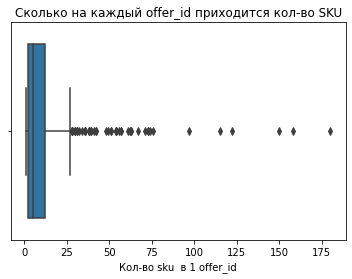

In [81]:
ax = sns.boxplot(x="skus_sum",  data=offer_ids_sku)
plt.title('Сколько на каждый offer_id приходится кол-во SKU')
# Set x-axis label
plt.xlabel('Кол-во sku  в 1 offer_id')


In [47]:
offer_ids['offer_id'].value_counts() #889 offer id

Biweekly      231
Seasonal      211
Facades       200
Billboards     98
Name: offer_id, dtype: int64

In [ ]:
offer_ids

In [99]:
sku_pro = hier.groupby('sku').agg(
    promo_type = pd.NamedAgg(column = 'Promo_type', aggfunc = lambda x: ','.join(x.unique())),
    pro_type = pd.NamedAgg(column = 'Promo_type', aggfunc =  lambda x: set(x)),
    offer_id_sum = pd.NamedAgg(column = 'Offer_ID',aggfunc = lambda x: len(x.unique())),
    
    pro_type_sum = pd.NamedAgg(column = 'Promo_type',aggfunc = lambda x: len(x.unique())),
    offer_id = pd.NamedAgg(column = 'Offer_ID', aggfunc = lambda x: ','.join(x.unique())),
    date_diff_mean = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.mean      ),
    date_max = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.max      ),
    date_min = pd.NamedAgg(column = 'diff_dates',   aggfunc = np.min      ),
    start_month = pd.NamedAgg(column = 'month_st', aggfunc = np.mean),
    end_month = pd.NamedAgg(column = 'month_end', aggfunc = np.mean), 
    
    
)

In [ ]:
sku_pro

In [100]:
sku_pro.sort_values('pro_type_sum', ascending = False).head(50)

,promo_type,pro_type,offer_id_sum,pro_type_sum,offer_id,date_diff_mean,date_max,date_min,start_month,end_month
sku,,,,,,,,,,
95f87d8bfbb776309293f05660e5638e,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
330237fcfba03e0772a1c1d00c0a7943,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
802613d2fbd18f89fb84acc0ae0c14e5,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
2fa83b09c67e00b1bd11404e89f16930,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
6d2cf1b7fc44d90235c7669a9a61c79a,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
965da69b1fba48031db008dd8e49fb35,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
2ff210c8a37f06c9d580fab4a29c893b,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"491,562,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333
a2cec10f072791126bb33b7b5e2eaf7a,"Biweekly,Seasonal,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",5,4,"491,562,F37,B116,660",14.400000,27.0,6.0,7.200000,7.600000
3307b9c605f63b9b721b96f63e339a7e,"Seasonal,Biweekly,Facades,Billboards","{Biweekly, Billboards, Facades, Seasonal}",6,4,"562,491,F37,312,B116,660",14.166667,27.0,6.0,7.333333,7.833333


In [115]:
sku_pro

,promo_type,pro_type,offer_id_sum,pro_type_sum,offer_id,date_diff_mean,date_max,date_min,start_month,end_month
sku,,,,,,,,,,
00033dd12618c86f7451b1e18af8bb60,Seasonal,{Seasonal},1,1,459,13.000000,13.0,13.0,1.0,2.000000
00104b38b0b48f14e6b94c294a91356b,Seasonal,{Seasonal},3,1,"36,560,158",14.333333,20.0,10.0,5.0,5.333333
00218695e83d28a79151ef327e51200c,"Billboards,Biweekly,Seasonal","{Biweekly, Billboards, Seasonal}",5,3,"B55,54,205,550,646",13.000000,13.0,13.0,6.2,6.400000
002efbd1c274c4d3dd21e48787124a93,Biweekly,{Biweekly},1,1,122,13.000000,13.0,13.0,7.0,7.000000
00432d021eca6059fee2ed69a732c2b2,"Facades,Biweekly","{Biweekly, Facades}",5,2,"F77,333,349,284,683",11.600000,13.0,6.0,5.4,6.000000
...,...,...,...,...,...,...,...,...,...,...
ffa166df1e2c14c932fe443de81dda34,Seasonal,{Seasonal},1,1,634,13.000000,13.0,13.0,9.0,10.000000
ffb361905f5828922df2edcc7d50d3b8,Seasonal,{Seasonal},1,1,339,21.000000,21.0,21.0,3.0,4.000000
ffd28420812333369041b2434a483ee8,Seasonal,{Seasonal},1,1,24,27.000000,27.0,27.0,6.0,6.000000


In [104]:
sorted_sku = sku_pro.sort_values('offer_id_sum', ascending = False)[['promo_type', 'offer_id_sum', 'start_month', 'end_month']].head(50)

In [116]:
sorted_sku_promp = sku_pro.sort_values('pro_type_sum', ascending = False)[['pro_type_sum','promo_type', 'offer_id_sum', 'start_month', 'end_month']].head(50)

In [117]:
sorted_sku_promp

,pro_type_sum,promo_type,offer_id_sum,start_month,end_month
sku,,,,,
95f87d8bfbb776309293f05660e5638e,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
330237fcfba03e0772a1c1d00c0a7943,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
802613d2fbd18f89fb84acc0ae0c14e5,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
2fa83b09c67e00b1bd11404e89f16930,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
6d2cf1b7fc44d90235c7669a9a61c79a,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
965da69b1fba48031db008dd8e49fb35,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
2ff210c8a37f06c9d580fab4a29c893b,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333
a2cec10f072791126bb33b7b5e2eaf7a,4,"Biweekly,Seasonal,Facades,Billboards",5,7.200000,7.600000
3307b9c605f63b9b721b96f63e339a7e,4,"Seasonal,Biweekly,Facades,Billboards",6,7.333333,7.833333


In [46]:
sku_pro['pro_type'].value_counts()

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{Seasonal}                                   1292
{Biweekly}                                    679
{Facades}                                     607
{Biweekly, Facades}                           243
{Biweekly, Seasonal}                          222
{Biweekly, Facades, Seasonal}                 191
{Seasonal, Facades}                           130
{Billboards}                                  116
{Biweekly, Billboards}                        109
{Biweekly, Billboards, Seasonal}               91
{Billboards, Facades}                          90
{Biweekly, Billboards, Facades}                73
{Billboards, Seasonal}                         18
{Biweekly, Billboards, Facades, Seasonal}      12
{Seasonal, Billboards, Facades}                 1
Name: pro_type, dtype: int64

In [43]:
sku_pro['offer_id'].value_counts()

519                                   136
451                                    92
F38,679                                72
F235                                   67
585                                    63
                                     ... 
F1,F64,F108,B61,F39,B135,F252,F265      1
73,684                                  1
F14,F21                                 1
122                                     1
623                                     1
Name: offer_id, Length: 686, dtype: int64

In [110]:
joined_sku_offers = sorted_sku.merge(offers, how = 'inner', on = 'sku')

In [108]:
offers

,sku,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,29285fb39582e5a63c14026198c6ad51,44a7b825383402ed937a15fb8a5bb12a,9a1158154dfa42caddbd0694a4e9bdc8,f50c7035e532c49a0f6993d988e2e843,e9f41ed96e63ca1be6aea099625afe6f
1,f31d0af494b191ef2bc8395db9c8366f,44a7b825383402ed937a15fb8a5bb12a,ad61ab143223efbc24c7d2583be69251,84e8ce7870f0eecd843366582bb95a28,b7fa186535a75c869bfaece622c72689
2,49edad6669ba09dffbf278b76c53cd9d,cc9284597026dcc021735c0970ca0c93,1c383cd30b7c298ab50293adfecb7b18,2a3d6d6cc4b5e77238c1fc1bb6cdd681,7e0e0c1fe174b2d2efbf5ae0e2bc3ee9
3,c5c632eb0f93a233ef6db2620a464ea0,44a7b825383402ed937a15fb8a5bb12a,d82c8d1619ad8176d665453cfb2e55f0,b27d5296bede63b1493a5d321d4e8092,ec2acf8ebfdb679d5fc87caadd98fb58
4,9d0c7880f16c7748e1e992b28655c67f,cc9284597026dcc021735c0970ca0c93,6ea9ab1baa0efb9e19094440c317e21b,379a7ba015d8bf1c70b8add2c287c6fa,5aec2478fac4d1ee912c794c343d036c
...,...,...,...,...,...
80401,33d0eb46ca492585ccf3ba2bcc19ed30,44a7b825383402ed937a15fb8a5bb12a,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,b02ece95d7615f1b007e29a316cd7292
80402,bb47f5bc8df7b92ae0600c7d85a567fd,cc9284597026dcc021735c0970ca0c93,a1d0c6e83f027327d8461063f4ac58a6,3335881e06d4d23091389226225e17c7,4028a78ad465aea9c6024f81ca22c78d
80403,e9311b17cd22904c2d6fee2e3c8b6d5f,44a7b825383402ed937a15fb8a5bb12a,ad61ab143223efbc24c7d2583be69251,dcc5c249e15c211f21e1da0f3ba66169,9b4166e30f69d57136493e52c97bc874
80404,15cafb345d5e95b3ae83f2cbb87e0f72,44a7b825383402ed937a15fb8a5bb12a,d2ddea18f00665ce8623e36bd4e3c7c5,a523426cc585745318d5f6d91a9c0706,846a6cd5242ad9c4e8eea0621a9cf252


In [111]:
joined_sku_offers

,sku,promo_type,offer_id_sum,start_month,end_month,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,5abc0869d756fa1c6831651776138baa,"Billboards,Facades",18,8.055556,7.000000,cc9284597026dcc021735c0970ca0c93,6512bd43d9caa6e02c990b0a82652dca,c6bff625bdb0393992c9d4db0c6bbe45,f824ea3cd7cea49116eda11b5d23f9b0
1,33306ccd877e73c388652739869d3dc7,"Billboards,Facades",18,6.500000,6.000000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,7501e5d4da87ac39d782741cd794002d,9076db4895b417d4a668cb0b7168e4db
2,7a8675a8f6988ebcbefd062fabaccc85,"Billboards,Facades",16,7.625000,6.375000,cc9284597026dcc021735c0970ca0c93,6512bd43d9caa6e02c990b0a82652dca,c667d53acd899a97a85de0c201ba99be,5f958aa50f12213d724b476ac436a658
3,c8ac520562ba934dd67cbf0f060c4252,"Billboards,Facades",11,6.818182,7.090909,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,7501e5d4da87ac39d782741cd794002d,1bc92b99fd45cc2e89907ad2770c2746
4,787762f7d829ce318599bf015baba175,"Billboards,Facades",11,6.636364,6.818182,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,c005b9a2626f6c1946e1851628724b18
5,911d7361089a37c2a6488a548b4f06a8,"Facades,Billboards",11,7.545455,7.000000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,443f66a5b7b672f4e9e57a3673a464a4
6,290765c709b1efb039791a793e5bac01,"Facades,Billboards",10,5.300000,5.500000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,bfbc1ad4f46a620cc54c9f70d9a03127
7,1467b1d6e6328f9c8f99c079bf0d8c4a,"Facades,Billboards",10,5.300000,5.500000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,bfbc1ad4f46a620cc54c9f70d9a03127
8,689b1532a1ed565a9e9baeed3624b2b4,"Facades,Billboards",10,5.300000,5.500000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,7501e5d4da87ac39d782741cd794002d,2a5ed9d84004659d23b85c410ae8208b
9,a26c8fd82b39d3a724fca6ec72797f2d,"Facades,Billboards",10,5.300000,5.500000,cc9284597026dcc021735c0970ca0c93,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,bfbc1ad4f46a620cc54c9f70d9a03127


In [112]:
joined_sku_offers['hierarchy_level1'].value_counts()

cc9284597026dcc021735c0970ca0c93    36
44a7b825383402ed937a15fb8a5bb12a    14
Name: hierarchy_level1, dtype: int64

In [113]:
joined_sku_offers['hierarchy_level2'].value_counts()

c20ad4d76fe97759aa27a0c99bff6710    19
d67d8ab4f4c10bf22aa353e27879133c    14
c16a5320fa475530d9583c34fd356ef5     9
6512bd43d9caa6e02c990b0a82652dca     4
182be0c5cdcd5072bb1864cdee4d3d6e     2
9bf31c7ff062936a96d3c8bd1f8f2ff3     2
Name: hierarchy_level2, dtype: int64

In [114]:
joined_sku_offers['hierarchy_level3'].value_counts()

fb2fcd534b0ff3bbed73cc51df620323    9
7501e5d4da87ac39d782741cd794002d    8
3341f6f048384ec73a7ba2e77d2db48b    7
c5d9256689c43036581f781c61f26e50    7
1be883eec3231f9fe43c35bd1b4b3bb5    7
c6bff625bdb0393992c9d4db0c6bbe45    2
f24ad6f72d6cc4cb51464f2b29ab69d3    2
c667d53acd899a97a85de0c201ba99be    2
147702db07145348245dc5a2f2fe5683    2
62f91ce9b820a491ee78c108636db089    2
41a60377ba920919939d83326ebee5a1    1
77f959f119f4fb2321e9ce801e2f5163    1
Name: hierarchy_level3, dtype: int64

In [125]:
joined_sku_offers_promo = sorted_sku_promp.head(11).merge(offers, how = 'inner', on = 'sku')

In [126]:
joined_sku_offers_promo

,sku,pro_type_sum,promo_type,offer_id_sum,start_month,end_month,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,95f87d8bfbb776309293f05660e5638e,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,07d877f1d713b6db2eba56114692ccec
1,330237fcfba03e0772a1c1d00c0a7943,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,9f4000434e6f9e8ccbbc49c98dbd47f8
2,802613d2fbd18f89fb84acc0ae0c14e5,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,06220f43ff8f72f24916bcba6cd937d3
3,2fa83b09c67e00b1bd11404e89f16930,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,a29d270c956f316b57db58f8dad8602e
4,6d2cf1b7fc44d90235c7669a9a61c79a,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,06220f43ff8f72f24916bcba6cd937d3
5,965da69b1fba48031db008dd8e49fb35,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,06220f43ff8f72f24916bcba6cd937d3
6,2ff210c8a37f06c9d580fab4a29c893b,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,32d37f9a0417a05ae41079bb112a6be1
7,a2cec10f072791126bb33b7b5e2eaf7a,4,"Biweekly,Seasonal,Facades,Billboards",5,7.200000,7.600000,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,9f4000434e6f9e8ccbbc49c98dbd47f8
8,3307b9c605f63b9b721b96f63e339a7e,4,"Seasonal,Biweekly,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,5c53e38c46a656814d0367f9732977e7
9,6fac98846ebd0ee2e4ca33c41d90243e,4,"Biweekly,Seasonal,Facades,Billboards",6,7.333333,7.833333,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,06220f43ff8f72f24916bcba6cd937d3


In [127]:
joined_sku_offers_promo['hierarchy_level1'].value_counts()

cc9284597026dcc021735c0970ca0c93    11
Name: hierarchy_level1, dtype: int64

In [128]:
joined_sku_offers_promo['hierarchy_level2'].value_counts()

c16a5320fa475530d9583c34fd356ef5    11
Name: hierarchy_level2, dtype: int64

In [129]:
joined_sku_offers_promo['hierarchy_level3'].value_counts()

c5d9256689c43036581f781c61f26e50    11
Name: hierarchy_level3, dtype: int64

In [ ]:
hierarchy['start_day_of_weekk'] = hierarchy['start_date'].dt.dayofweek

In [130]:

all = pd.read_csv('lentahack/checks_ofr_df.csv')



/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [145]:
all.iloc[5:, 5:]

,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name,index,Promo_type,Offer_ID,start_date,end_date,train_test_group,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4,UpLift
5,23:35:14,40e1372e6aebbf19d15dbf80150f96c5,314afc461f361ebf6d9bcc75eb1de65c,2,0.938,141.33,211.05,152f1b77a32508570e2745daf9ce7aec,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,1ff1de774005f8da13f42943881c655f,b53477c2821c1bf0da5d40e57b870d35,82266644483c41f453de682b9c0c9c81,NaN
6,23:35:14,6278f48a43fb0a23036b3a11c92e726c,e381db1eb941cd3410da420d07f745ef,3,2.164,53.06,43.27,152f1b77a32508570e2745daf9ce7aec,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,6f4922f45568161a8cdf4ad2299f6d23,f2d887e01a80e813d9080038decbbabb,96e0bececffda323c59ab5ff3751bf76,NaN
7,23:35:14,60a00033f132d3f517243bd507132c75,baa99df85f4cec0cd428a542206acdd8,1,1.000,25.46,38.68,152f1b77a32508570e2745daf9ce7aec,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,67c6a1e7ce56d3d6fa748ab6d9af3fd7,d33174c464c877fb03e77efdab4ae804,c0c63fd9650e7e6cd8332eb1dac4a50c,NaN
8,10:24:15,fd08cdca069262b8323fc383564afab7,7215ee9c7d9dc229d2921a40e899ec5f,1,1.000,62.20,139.98,152f1b77a32508570e2745daf9ce7aec,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,70efdf2ec9b086079795c442636b55fb,15231a7ce4ba789d13b722cc5c955834,8aed12138e0c8251d6d766d14200f989,NaN
9,10:24:15,81897979a2b7322a3854e02eaa8f79ca,7215ee9c7d9dc229d2921a40e899ec5f,2,2.000,221.37,399.02,152f1b77a32508570e2745daf9ce7aec,NaN,NaN,NaN,NaN,NaN,NaN,44a7b825383402ed937a15fb8a5bb12a,7f39f8317fbdb1988ef4c628eba02591,7bec7e63a493e2d61891b1e4051ef75a,556ef5548b49b2fa22f88a921feae370,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21512271,21:10:08,dc155ba1e8a3c759bcf2f358384ba9cd,f1b40313f0dc51fde3fe2cc7bc2b987f,10,1.000,63.63,99.89,7e35e74e610188414ad24235dd787c78,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,33e75ff09dd601bbe69f351039152189,4ab52371762b735317125e6446a51e8f,67866f6de5330f933196af71b03c7ad7,NaN
21512272,21:10:08,305d39a0a0af37b5436e8a3ff3e9d319,357f92d49be136644805a94cdbeb462a,6,1.000,185.70,298.99,7e35e74e610188414ad24235dd787c78,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,02e74f10e0327ad868d138f2b4fdd6f0,2e7ceec8361275c4e31fee5fe422740b,8ef17466868d9e29b21c4140f0205113,NaN
21512273,21:10:08,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,2,1.000,1.14,3.49,7e35e74e610188414ad24235dd787c78,NaN,NaN,NaN,NaN,NaN,NaN,44a7b825383402ed937a15fb8a5bb12a,d645920e395fedad7bbbed0eca3fe2e0,bd3ef5c19067fe179f71c8b86ea4b39b,5bf563e8f99ed820f322704e4898df6b,NaN
21512274,21:10:08,6540ad4c3e0b21d5a804b692dda6fe66,7215ee9c7d9dc229d2921a40e899ec5f,4,1.000,37.63,74.99,7e35e74e610188414ad24235dd787c78,NaN,NaN,NaN,NaN,NaN,NaN,cc9284597026dcc021735c0970ca0c93,17e62166fc8586dfa4d1bc0e1742c08b,b90ba83119860d7f6a6dfaab9f2aa150,1af4d75f6aa345536bdcf04b7b8be96d,NaN


In [151]:
checks


,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name
0,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b17c870027bb4a22e3aedb971bc00def,b3deb0286313f0b888c0eac49580cc23,1,5.0,133.40,249.45,152f1b77a32508570e2745daf9ce7aec
1,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,118.99,152f1b77a32508570e2745daf9ce7aec
2,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5,2.0,2.34,7.58,152f1b77a32508570e2745daf9ce7aec
3,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b25e0d42165d246d23cbf4d3efcdf583,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,23.59,39.99,152f1b77a32508570e2745daf9ce7aec
4,d9da50b77962ad6401d0527db5b65b04,20191230,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,a537d2eef30d47f9b11d655421ca93fb,05c93d4fa9bdbe70b5d2204ce9548ca9,3,1.0,24.02,39.99,152f1b77a32508570e2745daf9ce7aec
...,...,...,...,...,...,...,...,...,...,...,...,...
21479254,128bfb96146f0772ce9ce35365b5b402,20200101,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,dc155ba1e8a3c759bcf2f358384ba9cd,f1b40313f0dc51fde3fe2cc7bc2b987f,10,1.0,63.63,99.89,7e35e74e610188414ad24235dd787c78
21479255,128bfb96146f0772ce9ce35365b5b402,20200101,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,305d39a0a0af37b5436e8a3ff3e9d319,357f92d49be136644805a94cdbeb462a,6,1.0,185.70,298.99,7e35e74e610188414ad24235dd787c78
21479256,128bfb96146f0772ce9ce35365b5b402,20200101,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,2,1.0,1.14,3.49,7e35e74e610188414ad24235dd787c78
21479257,128bfb96146f0772ce9ce35365b5b402,20200101,087c8abfaee44ebbf0c2871976a2ab18,ac8cc7468ed294fcecebdcfa00d4280f,21:10:08,6540ad4c3e0b21d5a804b692dda6fe66,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,37.63,74.99,7e35e74e610188414ad24235dd787c78


In [154]:
checks['day'].value_counts().head(50)

2019-12-29    141262
2019-12-30    140797
2019-12-28    126777
2020-03-07    105109
2019-12-31    105010
2019-12-21    103426
2019-12-14    100014
2020-02-22     97775
2020-03-14     94554
2020-03-27     93642
2019-11-30     92357
2019-12-27     91542
2020-03-28     91275
2020-01-18     88901
2019-11-09     87827
2020-02-15     87004
2019-12-22     86319
2020-01-25     86286
2020-02-29     85807
2019-12-07     85681
2020-03-17     85651
2020-02-08     84997
2020-02-01     84336
2020-03-06     84155
2019-11-16     83680
2019-11-23     83624
2019-11-02     83200
2019-10-26     81130
2020-04-18     80720
2019-09-21     80548
2019-10-12     78847
2020-03-15     78385
2020-05-08     78318
2020-04-11     78120
2019-12-15     77518
2020-03-21     77509
2019-09-28     77250
2020-04-30     76919
2020-06-12     76867
2019-10-19     76778
2020-04-17     76535
2020-06-11     76346
2020-06-19     76048
2020-05-23     75531
2019-12-26     74881
2020-02-21     74750
2020-05-16     74729
2019-12-13   